# Композиции

<img src="https://i.artfile.me/wallpaper/24-01-2012/3000x2000/cvety-bukety-kompozicii-vazy-rozy-gorten-604750.jpg" width="700">

![](https://i.ibb.co/Wsf0s0m/bagging.jpg)

![](https://i.ibb.co/k16BL9v/boosting.jpg)

![](https://i.ibb.co/r5VPDd8/stacking.jpg)

## Стекинг на практике

In [0]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

Загрузим датасет, в котором записаны броски в игре дартс:

In [3]:
# !wget https://raw.githubusercontent.com/ben519/MLPB/master/Problems/Classify%20Dart%20Throwers/_Data/train.csv
train_df = pd.read_csv('train.csv')
train_df.head()

--2019-10-01 17:58:41--  https://raw.githubusercontent.com/ben519/MLPB/master/Problems/Classify%20Dart%20Throwers/_Data/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6774 (6.6K) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]   6.62K  --.-KB/s    in 0s      

2019-10-01 17:58:41 (120 MB/s) - ‘train.csv’ saved [6774/6774]



,ID,XCoord,YCoord,Competitor
0,111,0.943354,-0.184819,Bob
1,92,0.121557,-0.927656,Bob
2,20,0.818485,0.375437,Bob
3,75,0.867462,-0.159851,Sue
4,10,-0.817321,-0.373419,Kate


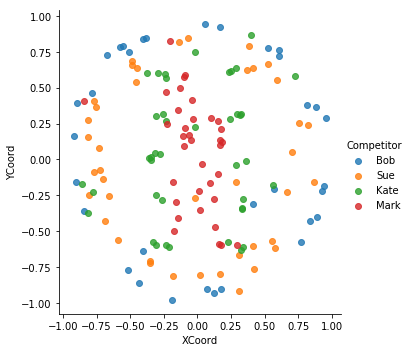

In [4]:
sns.lmplot('XCoord', 'YCoord', data=train_df, hue='Competitor', fit_reg=False)
plt.show()

In [5]:
!wget https://raw.githubusercontent.com/ben519/MLPB/master/Problems/Classify%20Dart%20Throwers/_Data/test.csv
test_df = pd.read_csv('test.csv')
test_df.head()

--2019-10-01 18:03:04--  https://raw.githubusercontent.com/ben519/MLPB/master/Problems/Classify%20Dart%20Throwers/_Data/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1690 (1.7K) [text/plain]
Saving to: ‘test.csv’

test.csv            100%[===================>]   1.65K  --.-KB/s    in 0s      

2019-10-01 18:03:05 (359 MB/s) - ‘test.csv’ saved [1690/1690]



,ID,XCoord,YCoord,Competitor
0,6,0.064729,0.356983,Mark
1,12,-0.766731,-0.255876,Sue
2,22,0.182282,-0.540976,Mark
3,34,-0.908910,0.223945,Bob
4,47,0.992230,-0.085550,Bob


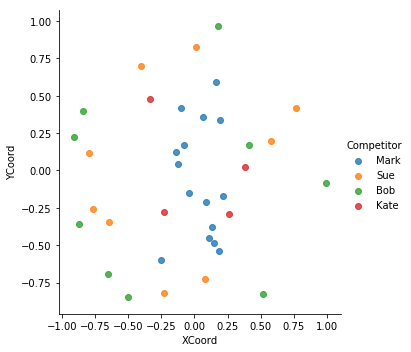

In [7]:
sns.lmplot('XCoord', 'YCoord', data=test_df, hue='Competitor', fit_reg=False)
plt.show()

Подготовим обучающую выборку в более привычном виде, а так же подготовимся к визуализации разделяющей плоскости:

In [0]:
X, y = train_df.values[:, 1:-1], train_df.values[:, -1:]

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

In [0]:
y_temp = []
for name in y:
    if name == 'Bob':
        y_temp.append(1)
    elif name == 'Mark':
        y_temp.append(2)
    elif name == 'Sue':
        y_temp.append(3)
    elif name == 'Kate':
        y_temp.append(4)
y = np.array(y_temp)

Наш первый подопытный - kNN:

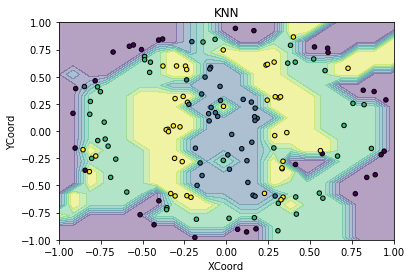

In [10]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X, y)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.title('KNN')
plt.xlabel('XCoord')
plt.ylabel('YCoord')
plt.show()

А второй - SVM:

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


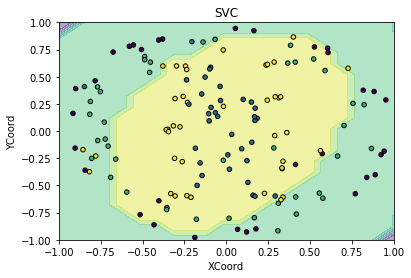

In [11]:
from sklearn.svm import SVC

clf = SVC(kernel='poly', degree=2)
clf.fit(X, y)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.title('SVC')
plt.xlabel('XCoord')
plt.ylabel('YCoord')
plt.show()

![](https://i0.wp.com/blog.kaggle.com/wp-content/uploads/2016/12/blog_base-model-train-class-regions.png?w=1024)

Когда у нас есть два базовых классификатора (каждый из которых, как видно, справляется с классификацией очень по-разному), можно попытаться выжать из их комбинации всё :)

## Рецепт хорошего стекинга

Самый лучший рецепт - это выполненный своими руками! ;) Поэтому, слушайте внимательно:

* **(0.3 балла)** Подберите оптимальные параметры для двух базовых классификаторов. Посчитайте для них accuracy.
* Разбейте train на 5 фолдов.
* **(0.3 балла)** Для каждого фолда из train обучите классификатор на остальных и в качестве мета-фичи объектов этого фолда запишите предсказания моделей
* **(0.3 балла)** Обучите модель на всём train и для каждого объекта из test вычислите мета-фичи
* **(0.3 балла)** Возьмите новый классификатор и обучите его на train с мета-фичами
* **(0.3 балла)** Предскажите метки на test и измерьте accuracy

И только сегодня! Тому, кто успеет на семинаре показать стекинг, набирающий наибольшую эффективность на test'е, получает дополнительный балл :)

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [0]:
X_test, y_test = test_df.values[:, 1:-1], test_df.values[:, -1:]

In [0]:
y_temp = []
for name in y_test:
    if name == 'Bob':
        y_temp.append(1)
    elif name == 'Mark':
        y_temp.append(2)
    elif name == 'Sue':
        y_temp.append(3)
    elif name == 'Kate':
        y_temp.append(4)
y_test = np.array(y_temp)

In [128]:
params_knn = {'n_neighbors': range(1, 5, 2)}
clf_knn = GridSearchCV(KNeighborsClassifier(), params_knn, cv=5)
clf_knn.fit(X, y)

Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
clf_svc = GridSearchCV(SVC(), params_svc, cv=5)
clf_svc.fit(X, y)

print('Accuracy SVC:', accuracy_score(clf_svc.predict(X_test), y_test))
print('Accuracy KNN:', accuracy_score(clf_knn.predict(X_test), y_test))

Accuracy SVC: 0.32432432432432434
Accuracy KNN: 0.7027027027027027


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default 

In [0]:
length = len(y)
X_folds = [X[i:i + length // 5, :] for i in range(0, length, length // 5)]
y_folds = [y[i:i + length // 5] for i in range(0, length, length // 5)]

In [137]:
new_cat_svc = []
new_cat_knn = []
for curr_fold_index in range(5):
  new_X = np.vstack([X_folds[i] for i in range(5) if i != curr_fold_index])
  new_y = np.hstack([y_folds[i] for i in range(5) if i != curr_fold_index])
  clf_tree.fit(new_X, new_y)
  clf_knn.fit(new_X, new_y)
  new_cat_svc = np.hstack((new_cat_svc, clf_svc.predict(X_folds[curr_fold_index])))
  new_cat_knn = np.hstack((new_cat_knn, clf_knn.predict(X_folds[curr_fold_index])))
  
X_with_new_features = np.hstack((X, new_cat_svc[None].T, new_cat_knn[None].T))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The def

In [0]:
X_test_with_new_features = np.hstack((X_test, clf_svc.predict(X_test)[None].T, clf_knn.predict(X_test)[None].T))

In [141]:
clf_log_regr = DecisionTreeClassifier()
clf_log_regr.fit(X_with_new_features, y)

print('Accuracy stacking:', accuracy_score(clf_log_regr.predict(X_test_with_new_features), y_test))

Accuracy stacking: 0.6756756756756757


## Как подбирать параметры стекинга?

Конечно же кросс-валидации + grid search. Например, на тех же фолдах, что и были для вычисления мета-фичей. Или не на тех же?..

## Полезные ссылки

* https://www.kaggle.com/arthurtok/introduction-to-ensembling-stacking-in-python - хорошая совсем вводная статья на Титанике
* http://blog.kaggle.com/2016/12/27/a-kagglers-guide-to-model-stacking-in-practice/ - хорошая статья на kaggle, по её мотивам сегодняшний семинар (но она на R)
* https://www.netflixprize.com/assets/GrandPrize2009_BPC_BigChaos.pdf - решение Netflix prize